---
author: Krtin Juneja (KJUNEJA@falcon.bentley.edu)
---

When performing a linear regression, the following assumptions should be checked.

### 1. We have two or more columns of numerical data of the same length.

The solution below uses an example dataset about car design and fuel consumption from a 1974 Motor Trend magazine.  (See how to quickly load some sample data.)  We can see that our columns all have the same length.

In [2]:
from rdatasets import data
df = data('mtcars')
df = df[['mpg','cyl','wt']]  # Select the 3 variables we're interested in
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mpg     32 non-null     float64
 1   cyl     32 non-null     int64  
 2   wt      32 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 896.0 bytes


### 2. Scatter plots we've made suggest a linear relationship.

Scatterplots are covererd in how to create basic plots, but after making the model,
we can also examine the residuals.

So let's make the model. Our predictors will be the number of cylinders and the weight of the car and the response will be miles per gallon. (See also how to fit a linear model to two columns of data.)

In [3]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

predictors = df[['cyl','wt']]
response = df['mpg']
model.fit( X=predictors, y=response )

predictions = model.predict(predictors)

We test for linearity with residual plots.  We show just one residual plot here; you should make one for each predictor.  Seaborn has a function for just this purpose.

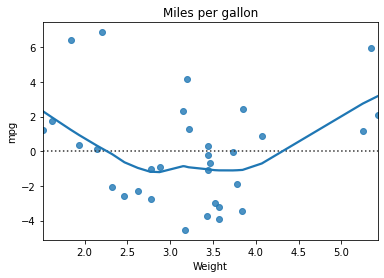

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
# The "lowess" parameter adds a smooth line through the data:
sns.residplot(x = df['wt'], y = response, data=df, lowess=True)
plt.xlabel("Weight")
plt.title('Miles per gallon')
plt.show()

### 3. After making the model, the residuals seem normally distributed.

We can check this by constructing a Q-Q plot, which compares the distribution of the residuals to a normal distribution. SciPy's `stats` module has a `probplot` function for this purpose.  The closer the blue residual values are to the red line, the closer their distribution is to normal.

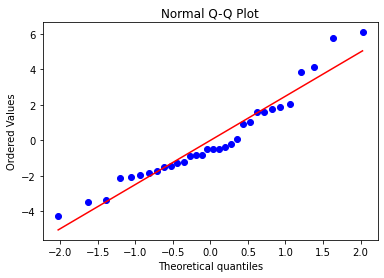

In [6]:
from scipy import stats
residuals = response - predictions  # Compute the residuals
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Normal Q-Q Plot")
plt.show()

### 4. After making the model, the residuals seem homoscedastic.

This assumption is sometimes called "equal variance," and can be checked by the `regplot` function in Seaborn. We must first standardize the residuals, which we can do with NumPy.  We want to see a plot with no clear pattern; a cone shape to the data would indicate heteroscedasticity, the opposite of homoscedasticity.

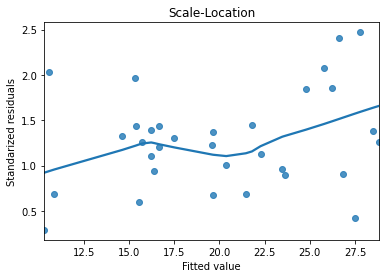

In [7]:
import numpy as np
standardized_residuals = np.sqrt(np.abs(residuals))
sns.regplot(x = predictions, y = standardized_residuals, scatter=True, lowess=True)
plt.ylabel("Standarized residuals")
plt.xlabel("Fitted value")
plt.title("Scale-Location")
plt.show()